
# Image Mining-Is there a bias in the depiction of a scientist in Google Images?

I remembered a discussion about male-bias when it comes to science. Thus, i choose to analyse if there is gender bias in the depiction of a scientist in google images. 
Quick defintion of what this bias actually mean. "Gender bias refers to systematic bias effects that are characterized by gender-related stereotyping and prejudices and influence 
both perceptions and decisions." (https://www.gesis.org/en/cews/topics/gender-bias/what-is-bias)
Growing up the stereotypical image of a scientist would be a caucasian old man with a lab-coat and oftentimes grey and wild hair such as Albert Einstein.
It is very important to adress such a bias because it can lead to an unfair treatment when recruiting scientist when these are less likely to be hired due their ethnicity or gender although they 
are perfectly qualified or even better qualified than their peers that fulfill this stereotype. Since many people use google images to give them an idea of something, the depictions should be bias-free. 

Method:
    
Fist we are going to load the first 50 google images into Python when searching for "scientist". There we are going to use gender detection in all of these pcitures and then see if there is bias towards
male or female scientist.
More precisely, we do this by counting the number of male and females faces to see if certain genders occur more often.
 
 

In [ ]:

#We start by installing and importing the necessary packages:

!pip install git+https://github.com/Joeclinton1/google-images-download.git --upgrade  
!pip install webcolors
!pip install wget

import pandas as pd #to handle dataframes
import cv2 #to work with a model                                                                                   
from google_images_download import google_images_download #to import google pics directly into python
import matplotlib.pyplot as plt #to display pictures
import matplotlib.image as mpimg #to display pictures
import os #used when removing faulty pictures
from PIL import Image #for image display
import io #not sure if needed
import urllib #not sure if needed
import matplotlib.pyplot as plt #for image display
from PIL import Image, ImageOps #for image display
from tensorflow.keras.preprocessing import image #also needed in the model
import numpy as np #for array computing
import wget # to download the model 
from tensorflow.keras.models import load_model #to load the models
from matplotlib.colors import to_hex #need for the model 
from tqdm.notebook import tqdm #to display process of out model





  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-hvdphhff
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-hvdphhff
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15792 sha256=043cbb8594962b710b66f3770aae1727f36578e3b491c667c672e24376cfbec6
  Stored in directory: /tmp/pip-ephem-wheel-cache-hmjkr8l9/wheels/1a/36/c9/53bd827bc241b69fe47b90731625459627f82694ecd8a88273
Successfully built google-images-download
  Found existing installation: google-images-download 2.8.0
    Uninstalling google-images-download-2.8.0:
      Successfully uninstalled google-images-download-2.8.0


In [ ]:
from google.colab import drive  #we start by connecting our cloud to google colab
drive.mount('/content/gdrive') 

In [ ]:
MY_QUERY = "Scientist" #Here we select the query that we are analysing
N_IMAGES = 50 #and the number of images
OUTPUT_DIR = '/content/gdrive/MyDrive/data_mining_q2/' #as well as the output folder of the images

In [ ]:


response = google_images_download.googleimagesdownload() 
arguments = {"keywords": MY_QUERY,
             "limit": N_IMAGES, # 50 images
             "output_directory":OUTPUT_DIR,
             "print_urls":True}   
paths = response.download(arguments)          #This command downloads our pictures


Item no.: 1 --> Item name = Scientist
Evaluating...
Starting Download...
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Researcher_looking_through_microscope.jpg/1200px-Researcher_looking_through_microscope.jpg
Completed Image ====> 1.1200px-researcher_looking_through_microscope.jpg
Image URL: https://cdn.the-scientist.com/assets/articleNo/66230/aImg/32939/scientists-at-work-in-the-lab-l.jpg
Completed Image ====> 2.scientists-at-work-in-the-lab-l.jpg
Image URL: https://cdn.the-scientist.com/assets/articleNo/66520/aImg/33891/women-in-science-l.jpg
Completed Image ====> 3.women-in-science-l.jpg
Image URL: https://thumbor.forbes.com/thumbor/fit-in/1200x0/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fdam%2Fimageserve%2F1163531587%2F0x0.jpg%3Ffit%3Dscale
Completed Image ====> 4.https%3a%2f%2fspecials-images.forbesimg.com%2fdam%2fimageserve%2f1163531587%2f0x0.jpg%3ffit%3dscale.jpg
Image URL: https://static.independent.co.uk/s3fs-public/thumbna

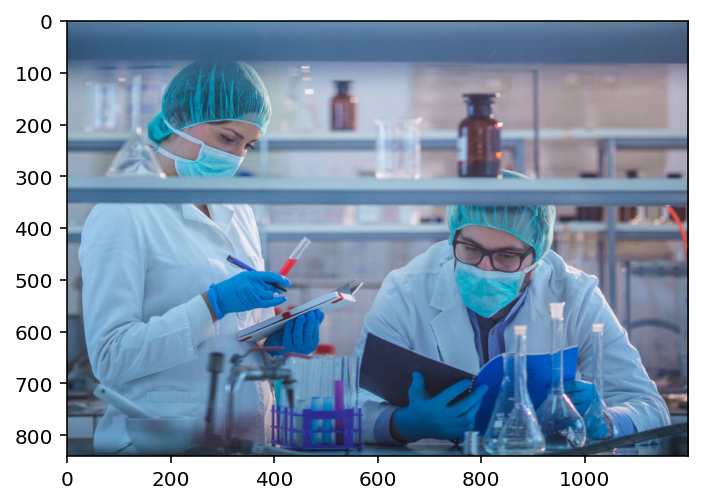

In [ ]:


plt.imshow(mpimg.imread(paths[0][MY_QUERY][1])) # we print our first image to see if it worked and this is indeed the first image that shows up
                                                #when you google the word "scientist"

In [ ]:


#Remove faulty images

OUTPUT_DIR_QUERY = os.path.join(OUTPUT_DIR, MY_QUERY) 
for filename in os.listdir(OUTPUT_DIR_QUERY):
    output_dir_file = os.path.join(OUTPUT_DIR_QUERY, filename)
    try :
        with Image.open(output_dir_file) as im:
             print('ok')
    except :
        print(output_dir_file)
        os.remove(output_dir_file)  

In [ ]:
paths #we display the paths of the pictures to give me first impression how they are set up

({'Scientist': ['/content/gdrive/MyDrive/data_mining_q2/Scientist/1.1200px-researcher_looking_through_microscope.jpg',
   '/content/gdrive/MyDrive/data_mining_q2/Scientist/2.scientists-at-work-in-the-lab-l.jpg',
   '/content/gdrive/MyDrive/data_mining_q2/Scientist/3.women-in-science-l.jpg',
   '/content/gdrive/MyDrive/data_mining_q2/Scientist/4.https%3a%2f%2fspecials-images.forbesimg.com%2fdam%2fimageserve%2f1163531587%2f0x0.jpg%3ffit%3dscale.jpg',
   '/content/gdrive/MyDrive/data_mining_q2/Scientist/5.scientists.jpg',
   '/content/gdrive/MyDrive/data_mining_q2/Scientist/6.female_scientist_at_work_160114.jpg',
   '/content/gdrive/MyDrive/data_mining_q2/Scientist/7.1598911974204.jpg',
   '/content/gdrive/MyDrive/data_mining_q2/Scientist/8.modern-laboratory-two-scientists-conduct-260nw-685086652.jpg.webp',
   '/content/gdrive/MyDrive/data_mining_q2/Scientist/9.life-scientist.jpg',
   '/content/gdrive/MyDrive/data_mining_q2/Scientist/10.tousled-professor-examining-samples-under-microscope

In [ ]:
type(paths)  #i need our models to work with a dataframe. That is why I need to know what object type paths in order to transfer it into a df.

tuple

In [ ]:
destructured_paths = paths[0]

In [ ]:
path_list = list(destructured_paths.values()) #we get the key value pairs of the dictionary destructured_paths

In [ ]:
flatten = lambda t: [item for sublist in t for item in sublist] #we run the flatten command to make it in 1 array

In [ ]:
path_list = flatten(path_list) #path_list is an array of array of strings so it can be made directly into a dataframe

In [ ]:
df = pd.DataFrame({'Path':path_list})  #and then we create the dataframe

In [ ]:
df #We display to see if it worked. Looks good.

,Path
0,/content/gdrive/MyDrive/data_mining_q2/Scienti...
1,/content/gdrive/MyDrive/data_mining_q2/Scienti...
2,/content/gdrive/MyDrive/data_mining_q2/Scienti...
3,/content/gdrive/MyDrive/data_mining_q2/Scienti...
4,/content/gdrive/MyDrive/data_mining_q2/Scienti...
5,/content/gdrive/MyDrive/data_mining_q2/Scienti...
6,/content/gdrive/MyDrive/data_mining_q2/Scienti...
7,/content/gdrive/MyDrive/data_mining_q2/Scienti...
8,/content/gdrive/MyDrive/data_mining_q2/Scienti...
9,/content/gdrive/MyDrive/data_mining_q2/Scienti...


In [ ]:
#load the images and convert it to an array.

%config InlineBackend.figure_format='retina' 

def load_image_from_url(url, target_size=None, color_mode='rgb'):
    assert color_mode in ('grayscale', 'rgb'), 'color_mode must be "grayscale" or "rgb"'
    response = urllib.request.urlopen(url)
    img = Image.open(io.BytesIO(response.read()))
    img = img.convert('RGB')
    if color_mode == 'grayscale':
        img = ImageOps.grayscale(img)
    if target_size:
        img = img.resize(target_size, Image.NEAREST) # resize
    return image.img_to_array(img)

#define load image from path 

def load_image_from_path(image_path, target_size=None, color_mode='rgb'):
    pil_image = image.load_img(image_path, 
                               target_size=target_size,
                            color_mode=color_mode)
    return image.img_to_array(pil_image)

In [ ]:
elements = pd.DataFrame()         #we make a seperate df where we can later put the number of female and male faces to. We call it elements
elements['paths'] = df['Path']

In [ ]:
elements #we display it to see if it worked

,paths
0,/content/gdrive/MyDrive/data_mining_q2/Scienti...
1,/content/gdrive/MyDrive/data_mining_q2/Scienti...
2,/content/gdrive/MyDrive/data_mining_q2/Scienti...
3,/content/gdrive/MyDrive/data_mining_q2/Scienti...
4,/content/gdrive/MyDrive/data_mining_q2/Scienti...
5,/content/gdrive/MyDrive/data_mining_q2/Scienti...
6,/content/gdrive/MyDrive/data_mining_q2/Scienti...
7,/content/gdrive/MyDrive/data_mining_q2/Scienti...
8,/content/gdrive/MyDrive/data_mining_q2/Scienti...
9,/content/gdrive/MyDrive/data_mining_q2/Scienti...


In [ ]:
#gender qualification

#First we need to install a face detection feature because we need to detect the faces before telling if its a male or female face.
#Second we install gender recognition model


!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://github.com/oarriaga/face_classification/raw/master/trained_models/gender_models/gender_mini_XCEPTION.21-0.95.hdf5




--2021-01-18 10:14:01--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.07s   

2021-01-18 10:14:01 (13.3 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]

--2021-01-18 10:14:01--  https://github.com/oarriaga/face_classification/raw/master/trained_models/gender_models/gender_mini_XCEPTION.21-0.95.hdf5
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https:/

In [ ]:
  #The model

#!wget https://github.com/oarriaga/face_classification/raw/master/trained_models/gender_models/gender_mini_XCEPTION.21-0.95.hdf5

#model_url = 'https://github.com/oarriaga/face_classification/raw/master/trained_models/gender_models/gender_mini_XCEPTION.21-0.95.hdf5'
#gender_model = wget.download(model_url)



def apply_offsets(face_coordinates, offsets):
    """
    Derived from https://github.com/oarriaga/face_classification/blob/
    b861d21b0e76ca5514cdeb5b56a689b7318584f4/src/utils/inference.py#L21
    """
    x, y, width, height = face_coordinates
    x_off, y_off = offsets
    return (x - x_off, x + width + x_off, y - y_off, y + height + y_off)

gender_classifier = load_model('gender_mini_XCEPTION.21-0.95.hdf5') #we load the gender model

GENDER_OFFSETS = (10, 10)
INPUT_SHAPE_GENDER = gender_classifier.input_shape[1:3]

labels = ['woman', 'man']   #we define the labels and the output
n_female = []
n_male = []

for i in tqdm(range(0,len(df))):   #we iterate through the picture links in the df
    pre_image = load_image_from_path(df.Path.values[i], color_mode='grayscale')
    gray_image = np.squeeze(pre_image).astype('uint8')

    face_classification = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") # load the classifier 
    faces = face_classification.detectMultiScale(gray_image, 1.3, 5) # detect the faces
    
    male = 0
    female = 0
    
    for face_coordinates in faces: # using the output of the CascadeClassifier
        try:
            x1, x2, y1, y2 = apply_offsets(face_coordinates, GENDER_OFFSETS) # extends the bounding box
            face_img = gray_image[y1:y2, x1:x2] # only get the face 
            face_img = cv2.resize(face_img, (INPUT_SHAPE_GENDER)) # resize the image
            face_img = face_img.astype('float32') / 255.0 # preprocess the image
            face_img = np.expand_dims(face_img, 0) # batch of one
            probas = gender_classifier.predict(face_img)
        except:
            print('Error..continuing')
            continue
            
        if labels[np.argmax(probas[0])] == 'man':
            male += 1
        elif labels[np.argmax(probas[0])] == 'woman':
            female += 1
    
    n_male.append(male)
    n_female.append(female)

In [ ]:
elements['n_male'] = n_male         #in the elements df we put two new columns where put the n umber of male and female faces
                                    #in two seperate columns. We got the n of female and male faces from the model above. 
elements['n_female'] = n_female

In [ ]:
elements # let us have a look if it worked. Looks good

,paths,n_male,n_female
0,/content/gdrive/MyDrive/data_mining_q2/Scienti...,0,0
1,/content/gdrive/MyDrive/data_mining_q2/Scienti...,0,0
2,/content/gdrive/MyDrive/data_mining_q2/Scienti...,0,0
3,/content/gdrive/MyDrive/data_mining_q2/Scienti...,0,0
4,/content/gdrive/MyDrive/data_mining_q2/Scienti...,0,1
5,/content/gdrive/MyDrive/data_mining_q2/Scienti...,0,0
6,/content/gdrive/MyDrive/data_mining_q2/Scienti...,0,0
7,/content/gdrive/MyDrive/data_mining_q2/Scienti...,0,0
8,/content/gdrive/MyDrive/data_mining_q2/Scienti...,0,0
9,/content/gdrive/MyDrive/data_mining_q2/Scienti...,1,1


In [ ]:
elements.to_csv('gender4.csv') #i want to look at in excel so i can see the entire path, to look at the actual pictures to if see if our model performs well

In [ ]:
#Although the model performs inaccurately we return the sum of each column to see which gender occurs more often.Code taken 
#from: https://www.javatpoint.com/pandas-sum#:~:text=sum()%20function%20is%20used,the%20values%20in%20each%20column

elements.sum(axis=None, skipna=None, level=None, numeric_only=None, min_count=0)  


paths       /content/gdrive/MyDrive/data_mining_q2/Scienti...
n_male                                                     11
n_female                                                   18
dtype: object

Conclusion
 
 If the model was accurate I would now conclude that there is female-bias in the pictures since there are almost twice as many female faces than male faces. (18 female, 11 male faces).

The problem is that the results are unfortunately inaccurate. For example picture of row 21 in the elements df.  (https://images.theconversation.com/files/321118/original/file-20200317-60932-4emq22.jpg?ixlib=rb-1.1.0&rect=1211%2C0%2C4914%2C4912&q=45&auto=format&w=240&h=240&fit=crop) clearly shows two female scientist .The model found only one female face.
 
 Let break down the main reasons for inaccuracy. The first and the main reason is that faces are not detected at all.  All of the 50 pictures had faces in them,but only 19 of those photos were found to contain faces. This I believe to be the case due to the fact that in many pictures the scientist are wearing a lot protective laboratory clothing that makes it hard to identify the faces. Another reason is that our classifier seems to have have problems with non-frontal face-shots as well as comic or paint like depictions of scientists. 

Albeit less significant than the false detection, another reason for the innaccuracy is the false gender detection. One example is the picture in row 23 of the elements df. (https://image.cnbcfm.com/api/v1/image/105621863-1544568196063scientistsinlaboratory.jpg?v=1544568229&w=1400&h=950). The picture shows 3 female and 5 male scientist. The model identified 6 male and 2 female scientist. This was not the only false gender labelling example. The reason for this type of innaccuracy I believe again to be non frontal shots, protective clothing as well as technical model weaknesses.

For future projects I would use more sophisticated face detection packages such as Deep learning-based face detectors.

Disussion:

Another question that could be analysed is if there is an ethnic or an age bias in the google images since especially the first one is an important societal debate. Here ist just one example of the many articles that talk about this. https://science.sciencemag.org/content/369/6502/351https://science.sciencemag.org/content/369/6502/351 

For the ethnic bias analysis, a very simplified strategy would be to go about detecting the faces and then looking for the dominant color. But this is not necessary nor accurate since there are already ethncity detection models such as "Deepface (https://www.youtube.com/watch?v=7pZsfAWdavM). Similar models for age prediction exist for example with Deep learning-based face detectors. 